In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(f"TF version {tf.__version__}")

TF version 2.19.0


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, Y = make_classification(
    n_samples=10000,n_features=20,n_informative=15,
    n_redundant=5,n_classes=2,random_state=42
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [3]:
X_train.shape[1]

20

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

modelo = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1], )),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid"),
])

modelo.compile(
    optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
    metrics = ['accuracy']
)
modelo.summary()

c:\Users\Usuario\anaconda3\envs\MITxPRO\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = modelo.fit(
    X_train, Y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7206 - loss: 0.5394 - val_accuracy: 0.9260 - val_loss: 0.1938
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9441 - loss: 0.1645 - val_accuracy: 0.9620 - val_loss: 0.1143
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9643 - loss: 0.1032 - val_accuracy: 0.9620 - val_loss: 0.1020
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.0901 - val_accuracy: 0.9667 - val_loss: 0.0919
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0842 - val_accuracy: 0.9647 - val_loss: 0.0979
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0742 - val_accuracy: 0.9633 - val_loss: 0.0984
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.9693 - val_loss: 0.0846
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0668 - val_accu

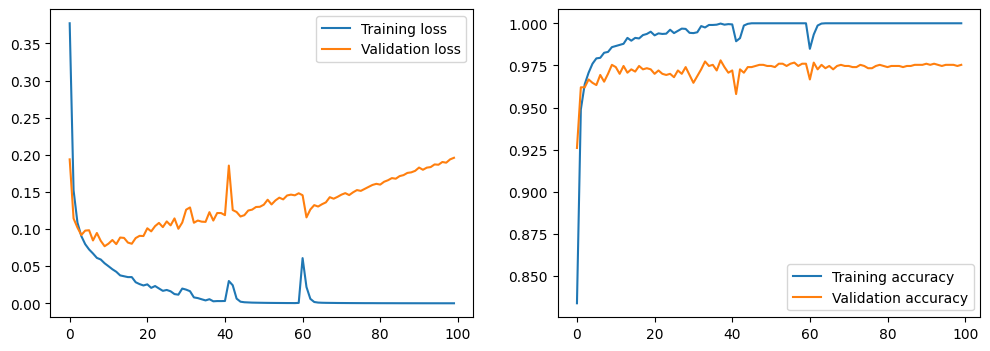

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['loss'], label="Training loss")
ax1.plot(history.history['val_loss'], label="Validation loss")
ax1.legend()

ax2.plot(history.history['accuracy'], label="Training accuracy")
ax2.plot(history.history['val_accuracy'], label="Validation accuracy")
ax2.legend()

plt.show()

